<a href="https://colab.research.google.com/github/dre1597/Alura-imersao-3/blob/main/Alura_Imers%C3%A3o_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

In [ ]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')

#Aula 01

##Leitura dos dados

Utilizamos a biblioteca pandas para trabalhar com os dados, logo, devemos importa-la utilizando o comando abaixo

In [ ]:
import pandas as pd

Foi disponibilizado a URL de um zip com os dados, ele está no formato csv, utlizando o pandas podemos utilizar o comando abaixo para conseguirmos transformamos desse formato para um dataset do pandas

Devemos lembrar de colocar o parâmetro adicional: comprission = 'zip', para descompactar

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

dados

###Pegando o ínicio do database

Como nossa base de dados é muito grande, para olharmos, por exemplo, só as colunas, podemos imprimir uma versão menor desse dataframe, apenas com os 5 primeiros itens: 

In [ ]:
dados.head()

##Pegando o número de linhas e colunas

Para sabermos a "forma" do nosso dataset, ou seja, o número de linhas e colunas, utilizamos o comando abaixo: 

In [ ]:
dados.shape

(23814, 877)

##Selecionando as colunas

Para selecionarmos as colunas, podemos utilizar a famosa notação ponto (primeiro exemplo) ou podemos utilizar essa notação abaixo, que é parecida com a notação para listas(vetores, arrays)

In [ ]:
dados.tratamento

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [ ]:
dados['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

## Valores únicos

Podemos verificar quais são os valores únicos de determinada coluna, utlizando o método unique().

In [ ]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Detalhes: Com droga - sobre o efeito do que foi testado // Com Controle - o grupo de controle sem o efeito do que foi testado

In [ ]:
dados['tempo'].unique()

array([24, 72, 48])

Detalhes: Tempo dado em hrs

In [ ]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Detalhes: Duas doses diferentes D1 e D2




In [ ]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Detalhes: Provavelmente o nome das drogas usadas ou algo do tipo ( criptografado )

In [ ]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

Detalhes: Provavelmente uma classificação para os genes identificados ou esperados ( normalizado ) 

##Contando os valores

Para contar quantos desses valores únicos nós temos, podemos usar o método value_counts()

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Além disso, podemos passar um paramêtro nesse método para retornar os valores de forma normalizada, em vez de valores brutos.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

##Gráficos

Para um simples gráfico de pizza.

In [ ]:
dados['tratamento'].value_counts().plot.pie()

Para um simples gráfico de barras

In [ ]:
dados['tratamento'].value_counts().plot.bar()

In [ ]:
dados['tempo'].value_counts().plot.bar()

Utilizando um filtro básico

In [ ]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

#Desafios Aula 01

Documentação do pandas: 
https://pandas.pydata.org/docs/reference/index.html#api

Documentação do matplotlib:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

##Desafio 01: Investigar por que a classe tratamento é tão desbalanceada

Pela coluna tratamento conseguimos verificar que aparentemente temos 2 tipos de valores: com_droga e com_controle

In [ ]:
dados['tratamento']

Podemos confirmar se são apenas 2 mesmo, utilizando o método unique()

In [ ]:
dados['tratamento'].unique()

Confirmado que são penas 2 valores, vamos entender o que eles significam: 

Em boa parte dos experimentos cientificos, se não todos, temos um grupo chamado "grupo de controle", que seria o grupo que está nas mesmas condições que os outros, com exceção do que queremos medir.

No nosso caso, temos os grupos que receberam os compostos e um grupo que não recebeu composto algum, sendo esse grup, o grupo de controle, onde teremos um comparativo do que seria o fluxo natural se não tivessemos utilizando nenhum composto.

Além disso, percebemos pelos valores brutos, que há uma diferença enorme entre a quantidade de linhas que contém o valor 'com_droga' e a quantidade de linhas que contém o valor 'com_controle'.

In [ ]:
dados['tratamento'].value_counts()

Podemos ver essa diferença gráficamente também.

In [ ]:
import matplotlib.pyplot as plt

plt.bar(dados['tratamento'].unique(), list(dados['tratamento'].value_counts()))
plt.title('Tipos de tratamento utilizados')
plt.ylabel('Número de observações')
plt.xlabel('Tratamentos')
plt.show()


Normalizando essa contagem, chegamos a 92.2% de tratamentos com drogas e 0.08% no grupo de controle.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Vamos dividir nosso olhar, apenas par os tratamentos com o valor 'com_controle'

In [ ]:
tratamento_com_controle = dados.query('tratamento == "com_controle"')
tratamento_com_controle

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0

Aparentemente temos apenas uma droga no grupo de controle, ao menos pelas que aparecem na parte mostrada acima. Podemos verificar isso com o método unique()

In [ ]:
tratamento_com_controle['droga'].unique()

array(['cacb2b860'], dtype=object)

Observando que temos 3289 drogas únicas, podemos dizer que é o motivo para esse desbalanceamento na coluna 'tratamentos', já que a representação do tratamento 'com_controle' na coluna droga é apenas um valor das 3289 drogas.

In [ ]:
len(dados['droga'].unique())

3289

##Desafio 02: Plotar as 5 últimas linhas da tabela

Basta utilizar o método:

In [ ]:
dados.tail()

##Desafio 03: Verificar a proporção dos dados da coluna tratamento

Basta utilizar o parâmetro normalize com o valor True, no método value_counts.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

##Desafio 04: Buscar quantas tipos de drogas foram investigadas

Basta calcular o length do método unique() usado na coluna 'droga'

In [ ]:
len(dados['droga'].unique())

##Desafio 05: Procurar na documentação o método query(pandas).

Documentação do método query: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html


In [ ]:
#Exemplo 1:

dados.query('dose == "D1"')


In [ ]:
#Exemplo 2:

dados.query('tempo == 24')

In [ ]:
#Exemplo 3:

dados.query('droga == "b68db1d53"')

##Desafio 06: Adicionar titulos e labels no gráficos.(matplotlib.pyplot)

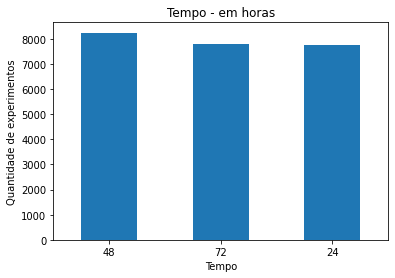

In [ ]:
dados['tempo'].value_counts().plot.bar()
plt.title('Tempo - em horas')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de experimentos')
plt.xticks(rotation = 0)
plt.show()

##Desafio 07: Renomear as colunas tirando o hífen.

In [ ]:
def rename_columns(dados):
    for i, elem in enumerate(dados.columns.values):
        if '-' in elem:
            novo_nome = elem.replace('-','')
            dados.columns.values[i] = novo_nome

In [ ]:
rename_columns(dados)
dados.head()

##Desafio 08: Resumo do que foi aprendido com os dados.

###Lista das observações

1.  Temos uma coluna descrita como "id", que contém identificadores únicos para cada experimento(linha do database).
2.   Temos uma coluna descrita como "tratamento", que indica se o experimento fazia parte do grupo que recebeu o tratamento com a droga ou do grupo de controle, que recebeu tudo que o grupo com a droga recebeu, menos a droga em si.
3.   Temos uma coluna descrita como "tempo", com o tempo que durou cada experimento, medido em horas.
4.  Temos uma coluna descrita como "dose", que provavalmente indica 2 tipos de doses diferentes classificadas como D1 e D2(podendo aqui serem doses com métodos de aplicações diferentes, quantidades diferentes, etc)
5.  Temos uma coluna descrita como "droga", que provavelmente indica os nomes das drogas utilizadas, mas criptografadas, possivelmente para que nem mesmo quem aplica as doses saiba qual está aplicando, como uma forma de diminuir a interferencia das ações e conclusões que poderiam já ocorrer só de saber o nome da droga aplicada.
6.  Temos colunas com nomes do tipo "g-n" e "c-n", onde n são numeros inteiros e ainda não temos muitas informações sobre.





###Detalhes das observações

####1 - Coluna 'id'

In [ ]:
dados.shape

In [ ]:
dados['id']

In [ ]:
dados['id'].shape

In [ ]:
dados.shape[0] == dados['id'].shape[0]

Podemos verificar que os ids sao únicos comparando o numero de linhas do dataframe geral de dados com o numero de linhas da série gerada pela coluna id

####2 - Coluna 'tratamento'

In [ ]:
dados['tratamento']

In [ ]:
dados['tratamento'].unique()

Temos 2 tipos de tratamento, com droga e com controle, sendo com o controle com as mesmas condições do tratamento com droga, exceto a droga em si.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

Além disso podemos verificar que a proporção entre esses 2 tipos é desbalanceada, como vimos no Desafio 1.

####3 - Coluna 'tempo'

In [ ]:
dados['tempo']

In [ ]:
dados['tempo'].unique()

array([24, 72, 48])

Temos 3 valores para o tempo de experimento, 24, 48 e 72, dados em horas.

In [ ]:
dados['tempo'].value_counts(normalize=True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

E podemos ver que que a proporção desses valores foi bem distribuída.

####4 - Coluna 'dose'

In [ ]:
dados['dose']

In [ ]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Temos 2 valores para as doses, provavelmente 2 doses diferentes, sejam em quantidade, aplicação, etc

In [ ]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Vemos novamente uma proporção bem distruída.

####5 - Coluna 'droga'

In [ ]:
dados['droga']

In [ ]:
dados['droga'].value_counts(normalize=True)

Podemos ver que a droga 'cacb2b860' aparece numa proporção maior que as outras, basicamente pois é a droga que está nos dois tipos de tratamento.

E temos 3229 drogas diferentes nos experimentos.

####6 - Outras colunas

Sobre as outras colunas ainda não temos muitas informações, apenas que provavelmente são informações sobre alguma medição referente aos genes ou outros objetivos dos experimentos. Além disso esses dados estão normalizados.

#Aula 02

##Mudando a coluna droga para composto

Como não temos drogas exatamente, talvez no máximo futuras drogas, mas por enquanto pequenos compostos pra testar nos experimentos, podemos trocar o nome da coluna 'droga', para 'composto'

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

Para que troque de fato nos dados, temos que colocar o parâmetro inplace como True. Temos que tomar cuidado nessa troca, pois agora as células acima não funcionam, caso usem o nome anterior.

In [ ]:
dados.head()

In [ ]:
compostos_head = dados['composto'].value_counts()[0:5]
compostos_head

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

In [ ]:
cod_compostos = compostos_head.index
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

##Plotando os top 5 compostos

In [ ]:
dados.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

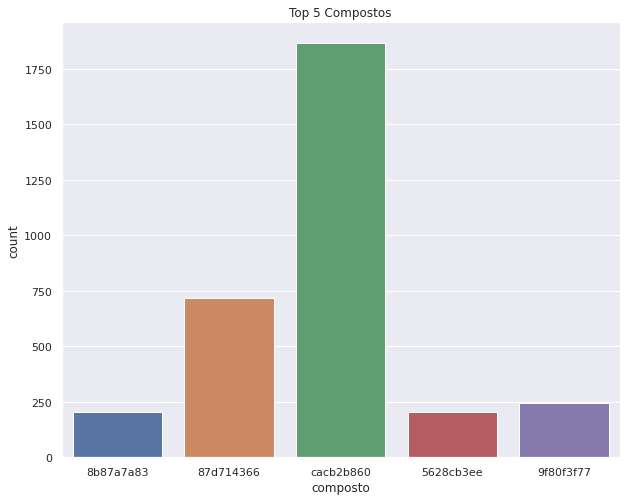

In [ ]:
sns.set()
plt.figure(figsize=(10, 8))

ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 Compostos')
plt.show()

### Trabalhando com as colunas gn e cn

Quantidade de valores únicos

In [ ]:
len(dados['g-0'].unique())

14367

Valor mínimo

In [ ]:
dados['g-0'].min()

-5.513

Valor máximo

In [ ]:
dados['g-0'].max()

10.0

Plotando um histograma

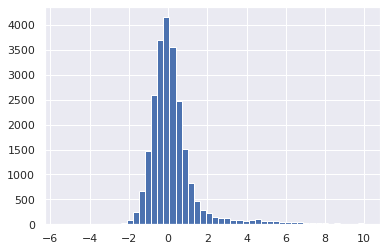

In [ ]:
dados['g-0'].hist(bins=50)

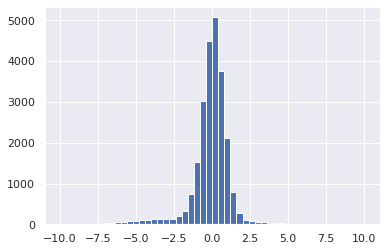

In [ ]:
dados['g-10'].hist(bins=50)

Pegando a média 

In [ ]:
dados['g-0'].mean()

0.24836629293692816

Pegando, além da média, os principais dados estatísticos

In [ ]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

Separando só as colunas gn

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

Pegando a matriz transposta da coluna gn

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T

,count,mean,std,min,25%,50%,75%,max
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g-767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g-768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g-769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g-770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


Fazendo um histograma só das médias

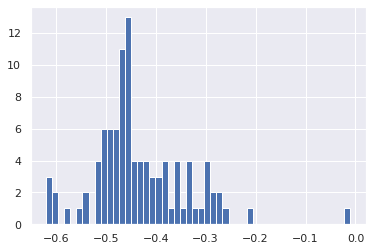

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['mean'].hist(bins=50)

Plotando um boxplot da coluna g0

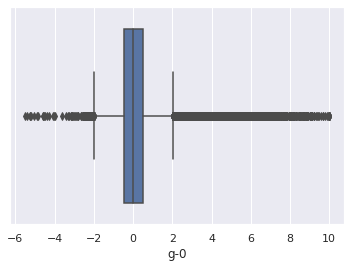

In [ ]:
sns.boxplot(x='g-0' , data=dados)

Plotando um boxplot da coluna tratamento

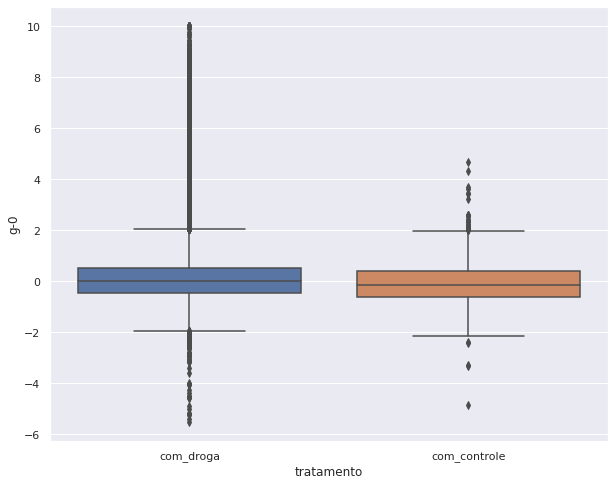

In [ ]:
dados.loc[:, 'c0':'c99'].describe().T['mean'].hist(bins=50)

#Desafios Aula 02

##Desafio 01: Ordernar o gráfico countplot

Podemos utilizar o parâmetro order para isso com o valor dos cod_compostos que já estão ordendados, no aso o slice [::-1] é para que pegue a ordem inversa.

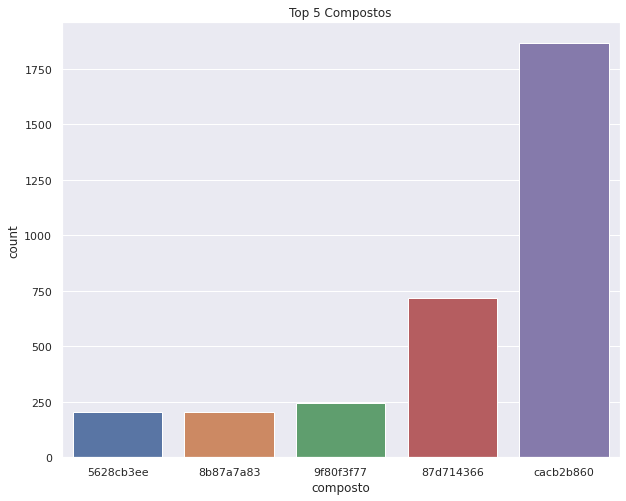

In [ ]:
sns.set()
plt.figure(figsize=(10, 8))

ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos[::-1])
ax.set_title('Top 5 Compostos')
plt.show()

##Desafio 02: Melhorar a visualização, alterando o tamanho da fonte, mudando os labels e afins

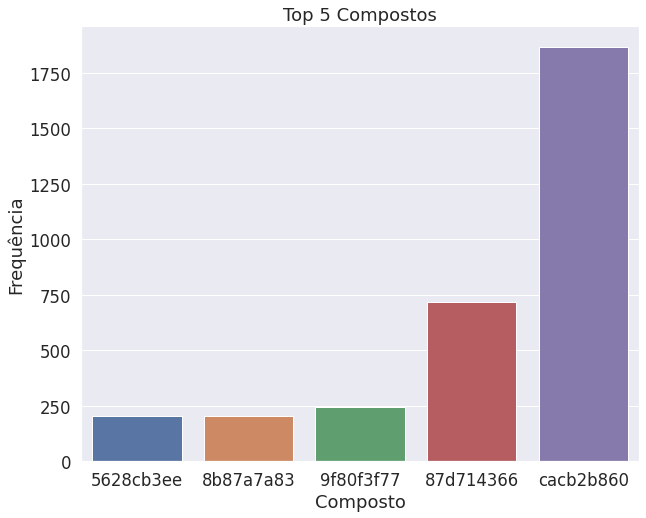

In [ ]:
sns.set()
sns.set_theme(font_scale=1.50)
plt.figure(figsize=(10, 8))

ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos[::-1])
ax.set_title('Top 5 Compostos')
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel('Composto', fontsize=18)
plt.show()

##Desafio 03 e 04: Plotar 2 gráficos em um só. Plotar os histogramas com seaborn

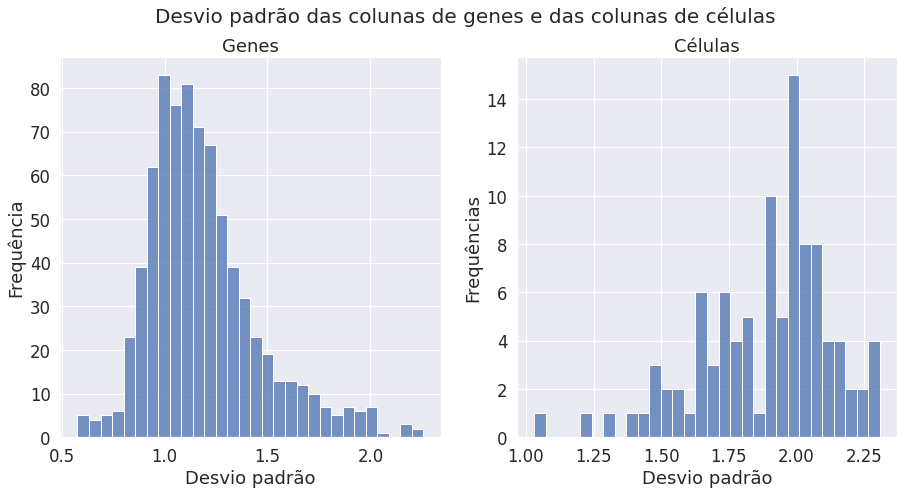

In [ ]:
genes = dados.loc[:, 'g-0':'g-771'].describe().T
celulas = dados.loc[:, 'c-0':'c-99'].describe().T
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax1.set_title('Genes')
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Desvio padrão')
sns.histplot(genes['std'], ax=ax1, bins=30)

ax2.set_title('Células')
ax2.set_ylabel('Frequências')
ax2.set_xlabel('Desvio padrão')
sns.histplot(celulas['std'], ax=ax2, bins=30)

fig.suptitle('Desvio padrão das colunas de genes e das colunas de células', fontsize=20)

plt.show()

##Desafio 05: Estudar sobre as estatísticas retornadas no describe()

In [ ]:
dados.describe()

count - conta o número de elementos da serie/database<br>
mean - média dos valores<br>
std - desvio padrão dos valores<br>
25%, 50%, 75% - o valor que está exatamente nessas porcentagens.<br>
Exemplo: Se temos uma lista de valores entre 0 e 1, 25% seria 0.25, 50% seria 0.50 e 75% seria 0.75 <br>
min - valor mínimo<br>
max - valor máximo<br>

In [ ]:
dados['composto'].describe()

count         23814
unique         3289
top       cacb2b860
freq           1866
Name: composto, dtype: object

count - conta o número de elemntos da serie/database<br>
unique - conta o número de elementos únicos<br>
top - o elemento de maior frequencia<br>
freq - a frenquencia desse valor dado no 'top'<br>

##Desafio 06: Refletir sobre a manipulação dos tamanhos das visualizações

O tamanho das visualizações depende muito do dispositivo na qual está sendo visualizado e principalmente qual informação você quer destacar. <br>
Muitas vezes um gráfico com um grande número de informações acaba não sendo efetivo se a pessoa que o está vendo busca uma informação mais específica, assim como um gráfico com apenas uma informação pode não ser suficiente para se entender algo.<br>




##Desafio 07: Fazer outras analises com o boxplot e o histograma. 

Continuando a analise na coluna g-0

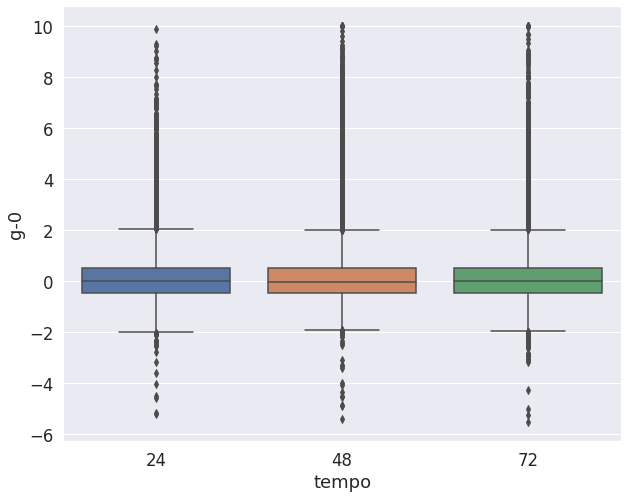

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='g-0', x='tempo', data=dados)
plt.show()

Podemos ver que mesmo para horas diferentes também tem uma grande concentração de resultados em torno do 0, assim como acontenceu com o tipo de tratamento.

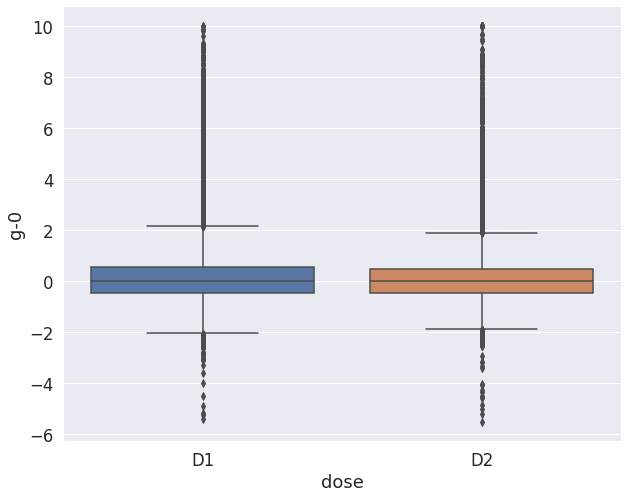

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='g-0', x='dose', data=dados)
plt.show()

Podemos verificar esse comportamento também em diferentes doses. Aparentemente, pelos dados serem normalizados, temos algo mais próximo de uma distribuição normal.

<function matplotlib.pyplot.show>

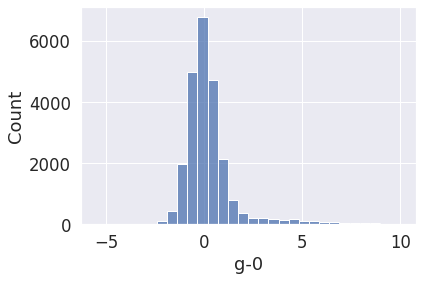

In [ ]:
sns.histplot(x='g-0', bins=30, data=dados)
plt.show

Uma coisa interessante de se notar, é que no nosso caso de experimentos testando drogas, os outlines podem acabar tendo um peso muito importante e vemos até um grupo bem grande de outlines, o que pode indicar um comportamento até que mais frequente do que em outros tipos de analise de dados, onde os outlines são realmente pontos fora da curva, no nosso caso pode ser que uma reação mais útil de ser analisado até do que os comportamentos mais frequentes.

##Desafio 08: Resumo do que foi aprendido com os dados

*  Aprendemos melhor o significado das drogas, não serem exatamente drogas, mas compostos que podem se tornar futuras drogas e um pouco do significado das colunas g-n e c-n.
*  Aprendemos sobre a importancia da visualização de dados e que a parte estética dos gráficos não é apenas estética, ela nos induz um destaque de alguma informação ou nos impede de ver alguma informação exatamente e se mal feita e utlizada pode acabar até induzindo algumas informações equivocadas.
*  Além dos histogramas, temos os boxplots que são outra forma de visualização gráfica de dados, contendo mais informações sobre áreas do gráfico, com um foco maior nos outlines.

#Aula 03

Documentação do crosstab: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [ ]:
pd.crosstab(dados['dose'], dados['tempo'])

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'],  normalize='index')

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

Para esse tipo de gráfico é mais ideal um scatterplot

In [ ]:
sns.scatterplot(x='g-0', y='g-3', data=dados)

In [ ]:
dados[['g-0', 'g-3']]

In [ ]:
sns.scatterplot(x='g-0', y='g-8', data=dados)

In [ ]:
sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color': 'red'})

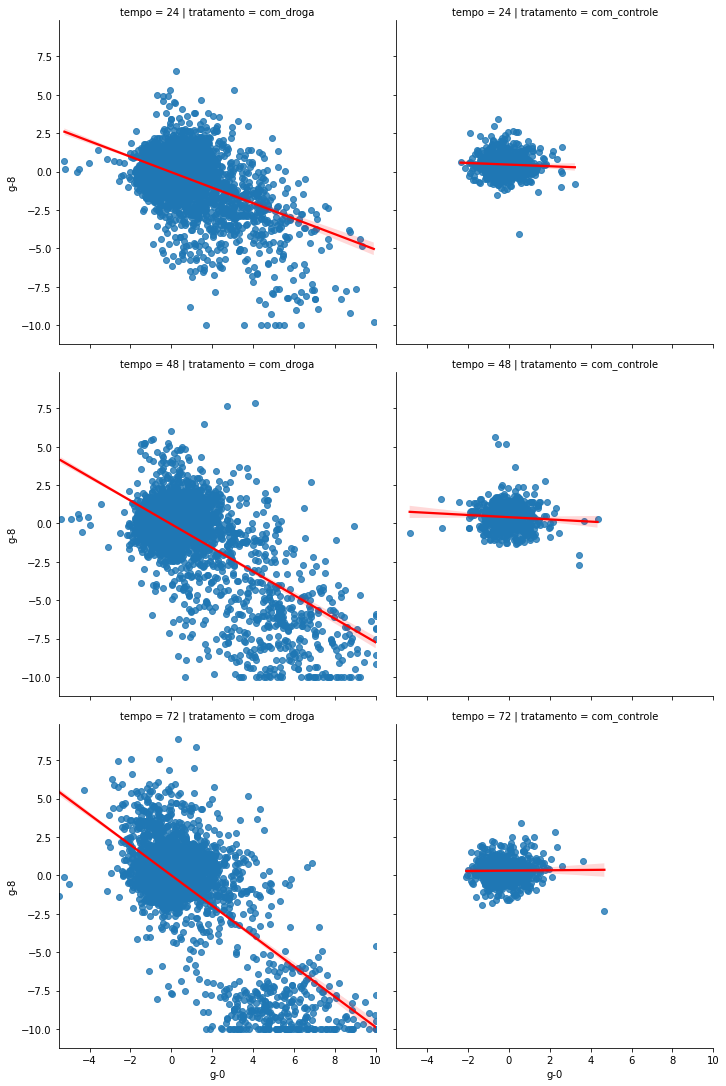

In [ ]:
sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color': 'red'}, col='tratamento', row="tempo")

Uma outra forma de vermos tendências nos nossos dados é utilizando o método corr()

In [ ]:
dados.loc[ : , 'g-0':'g-771'].corr()

In [ ]:
corr = dados.loc[ : , 'g-0':'g-50'].corr()

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr = dados.loc[ : , 'c-0':'c-50'].corr()

In [ ]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Desafios Aula 03

## Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [ ]:
dados.groupby(['dose', 'tempo']).size()

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
dados.groupby(['dose', 'tempo']).size().unstack(1)

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


## Desafio 02: Normalizar o crosstab pela coluna

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 03: Explorar outros agregadores

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

## Desafio 04: Explorar o Melt

Documentação do melt: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [ ]:
dados.melt

In [ ]:
dados.melt(id_vars='tratamento')

In [ ]:
dados.melt(id_vars='tratamento', value_vars='tempo')

In [ ]:
dados.melt(id_vars='tratamento', value_vars='tempo', var_name='tempo')

In [ ]:
dados.melt(id_vars='tratamento', value_vars='tempo', var_name='tempo', value_name='em hrs')

##Desafio 05: Calcular e analisar a correlação entre os gn e cn. Refletir sobre os efeitos biológicos

Verificando essa correlação nos dados do grupo de controle.


In [ ]:
dados_controle = dados[dados['droga'] == 'cacb2b860']
dados_controle['tratamento'].unique()

array(['com_controle'], dtype=object)

In [ ]:
g_filtrado = dados[dados['droga'] == 'cacb2b860'].loc[:,'g-0':'g-30']
c_filtrado = dados[dados['droga'] == 'cacb2b860'].loc[:,'c-0':'c-30']
concatenado = pd.concat([g_filtrado, c_filtrado], axis = 1)
concatenado

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30
25,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,0.4665,0.2532,0.7212,-0.4467,0.7621,0.2687,-0.1338,0.6366,0.6220,-0.3014,0.7567,1.2480,0.6420,1.5370,0.8386,0.8053,0.1935,1.3500,0.4042,1.5230,0.0741,0.2019,0.3635,0.3103,0.8123,0.4770,0.4972,0.4685,0.4348,0.5421,0.4056
38,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,0.1431,-0.1254,-0.0740,0.0288,-0.7198,-1.0040,0.3443,-0.6593,0.1020,-0.1742,0.0873,0.0208,0.1540,-0.6229,-0.3923,0.0964,-1.0500,0.9068,-0.0658,-0.1852,0.0576,0.5113,-0.3795,0.1957,-0.3674,0.1904,-0.1540,0.4123,-0.8581,-0.2263,0.7330
40,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,0.8107,0.7110,-0.0797,0.1703,1.7100,-0.0436,-0.2968,0.8906,-0.5218,1.2530,0.8287,0.9787,1.1110,-0.2813,0.3524,0.6322,1.4640,0.4940,0.4516,1.0320,0.8206,-0.0691,1.0970,0.2771,0.4753,0.2259,1.0160,0.4358,0.0752,0.9084,0.7651
47,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,-0.6666,0.3619,-0.4816,0.3545,0.0480,-0.1306,0.3623,-1.4190,0.1975,-0.2137,-0.3358,-0.9395,-0.1191,0.5055,-0.2079,0.1760,-0.5248,0.0266,-0.1298,-0.5139,-0.4645,-0.5434,-0.7326,-0.3624,-0.1764,-0.4371,-0.6318,0.5859,0.9494,-0.7306,0.2834
63,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.8432,0.4478,-0.8843,-0.6954,0.4762,0.9160,0.1785,0.2807,1.3500,0.1766,-0.1137,1.4910,-0.6229,-0.9833,-0.1895,0.5661,0.6124,-0.1581,0.3927,0.8244,0.5313,0.4941,-0.6869,0.0460,0.4194,0.5550,1.1300,-0.2166,0.6102,0.3593,-0.4806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0.0938,-0.6062,0.6108,-0.4900,0.1075,0.3029,-0.1369,0.6950,0.2731,0.6061,0.2976,0.3948,0.8336,1.1720,0.0790,0.3028,-0.0120,0.0781,0.2334,0.1682,0.3971,0.6605,-0.6505,-0.1283,-0.4924,0.1668,1.2440,-1.6380,0.5628,0.9434,0.9574,0.0359,1.1500,0.8947,-0.9647,-0.6059,0.4703,-0.1513
23747,-0.6204,-1.3800,-1.1880,-0.6573,-0.8408,-0.2447,1.3490,-0.5155,1.2610,-0.1790,-0.7182,-0.7885,0.3022,2.0140,0.1667,-0.7325,-0.1553,0.8400,-0.1069,-0.7247,1.3430,1.5010,-1.3370,0.7190,-0.0843,0.4841,-0.9104,1.3990,0.7447,-1.2110,0.6562,1.6290,-0.2854,0.2248,-1.4850,0.9749,0.6954,0.9388,0.0511,0.2647,1.0440,0.7449,1.0390,-0.1519,0.6743,1.3460,0.1894,0.7540,0.9674,0.6959,0.2556,1.5190,0.9388,-0.9945,-0.1075,0.9664,0.9317,0.4137,1.3970,-0.5932,0.1369,0.4803
23768,-0.1051,0.4335,0.3648,-0.0525,-0.3632,-0.3228,-2.3190,-0.5294,0.1878,0.5047,1.3820,0.6107,2.4790,0.4347,0.9422,-0.1042,-0.2611,1.5760,-0.0232,-0.2455,0.8058,-2.4180,-0.5838,-0.1626,-0.8609,-0.2021,0.1494,0

In [ ]:
concat_corr = concatenado.corr()


In [ ]:
mask = np.triu(np.ones_like(concat_corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(concat_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5})

Podemos ver que que a coorelação entre as celulas em si é bem mais baixa nesse conjunto de dados(apenas os experimentos do grupo de controle) do que no escolhido anteriormente( as 50 primeiras celulas). Enquanto a coorelação entre  os genes em si é bem mais pontual. Por último a coorelação entre os genes e as celulas ja é quase nula. Imagino que essa seja a ideia do grupo de controle, sendo algo mais neutro.

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

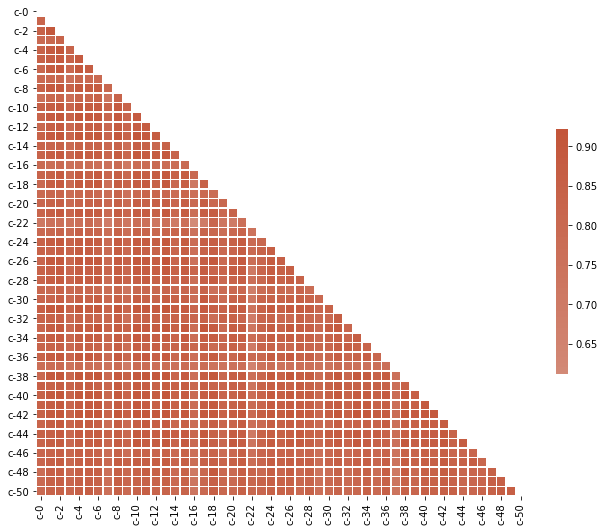

In [ ]:
corr = dados.loc[ : , 'c-0':'c-50'].corr()

# np.triu = valores de cima do triangulo
# Os valores onde a mascara vale não sao mostrados, valores nulos já fazem parte da mascara automaticamente.

mask = np.triu(np.ones_like(corr, dtype=bool))

# Seta a figura
f, ax = plt.subplots(figsize=(11, 9))

# Seta o mapa de cres
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# corr -> correlação 
# mask ->  mascara
# center -> onde fica o centro do mapa de calor
# square -> o formato dos pedaços do mapa
# linewidth -> o tamanho das linhas
# cbar_kws -> valores mandados pra outra camada do grafico feita pelo figure do matplotlib, no caso shrink seria pro tamanho do mapa de cores

##Desafio 07: Resumo do que você aprendeu com os dados

Pra essa aula não explorei muito os dados, apenas vi algumas coorelações, mas como sempre coorelações não significam causalidade.

Mas aprendi sobre alguns agregadores de dados, tabelas de frequências e uma forma automatizada de gerar coorelações em vez de ficar olhando dado a dado da tabela utilizando um mapa de calor.

# Aula 04

In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

Os resultados são 0 ou 1, 0 para ativam ou não esse mecânismo de ação

In [ ]:
contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Forma alternativa

In [ ]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

In [ ]:
dados_resultados.drop('id', axis=1).sum(axis=1)

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [ ]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

In [ ]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados

In [ ]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

In [ ]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

In [ ]:
compostos_principais = dados_combinados['droga'].value_counts().index[:6]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('droga in @compostos_principais'), y = 'g-0', x = 'droga', hue='ativo_moa')

#Desafios Aula 04

##Desafio 01: Encontrar o top 10 das ações do MOA(inibidor, agonista...)

In [ ]:
top_moa = dados_resultados.drop(['id'], axis=1).sum().sort_values(ascending=False)
top_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [ ]:
top_moa.filter(like='_inhibitor').head(10)

In [ ]:
top_moa.filter(like='_antagonist').head(10)

dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
acetylcholine_receptor_antagonist    301
histamine_receptor_antagonist        241
gaba_receptor_antagonist             165
cc_chemokine_receptor_antagonist     102
potassium_channel_antagonist          98
adenosine_receptor_antagonist         96
dtype: int64

In [ ]:
top_moa.filter(like='_agonist').head(10)

adrenergic_receptor_agonist        270
glucocorticoid_receptor_agonist    266
serotonin_receptor_agonist         236
acetylcholine_receptor_agonist     190
estrogen_receptor_agonist          158
dopamine_receptor_agonist          121
progesterone_receptor_agonist      119
ppar_receptor_agonist              115
gaba_receptor_agonist              106
glutamate_receptor_agonist          74
dtype: int64

In [ ]:
top_moa.filter(like='_activator').head(10)

potassium_channel_activator    55
nrf2_activator                 18
caspase_activator              18
ampk_activator                 12
adenylyl_cyclase_activator     12
dtype: int64

In [ ]:
top_moa.filter(like='_agent').head(10)

chelating_agent         54
dna_alkylating_agent    48
mucolytic_agent         48
dtype: int64

In [ ]:
top_moa.filter(like='_blocker').head(10)

calcium_channel_blocker     281
chloride_channel_blocker     42
dtype: int64

## Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

In [ ]:
pd.get_dummies(dados, columns=['tratamento'], dtype=float)

## Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

In [ ]:
pd.get_dummies(dados, columns=['tempo'], dtype=float)

## Desafio 04: Estudar sobre as combinações de DF

Artigo na documentação do pandas sobre Merge, join, concanate and compare https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Concat - Concatena os dfs passados por parâmetro via uma lista

In [ ]:
df1 = pd.DataFrame( {
    "A": ["value1", "value2", "value3"],
    "B": ["value4", "value5", "value6"],
    "C": ["value7", "value8", "value9"],
    }
)
df1

In [ ]:
df2 = pd.DataFrame( {
    "A": ["value10", "value11", "value12"],
    "B": ["value13", "value14", "value15"],
    "C": ["value16", "value17", "value18"],
    }
)
df2

In [ ]:
df3 = pd.DataFrame( {
    "A": ["value19", "value20", "value21"],
    "B": ["value22", "value23", "value24"],
    "C": ["value25", "value26", "value27"],
    }
)
df3

In [ ]:
df_concat_result = pd.concat([df1, df2, df3], ignore_index=True)
df_concat_result

append - Como o nome diz, adiciona no final a lista de dataframes passada por parâmetro

In [ ]:
df_append_result = df1.append([df2],  ignore_index=True)
df_append_result

merge - junta dataframes, se o parâmetro on não for pasado, ele pega a interseção de duas colunas ou series para ser as keys

In [ ]:
df_with_key1 = pd.DataFrame( {
    "key": ["key1", "key2", "key3"],
    "A": ["value1", "value2", "value3"],
    "B": ["value4", "value5", "value6"]
})
df_with_key1

In [ ]:
df_with_key2 = pd.DataFrame( {
    "key": ["key1", "key2", "key3"],
    "A": ["value7", "value8", "value9"],
    "B": ["value10", "value11", "value12"]
})
df_with_key2

In [ ]:
df_with_key_result = pd.merge(df_with_key1, df_with_key2, on="key")
df_with_key_result

,key,A_x,B_x,A_y,B_y
0,key1,value1,value4,value7,value10
1,key2,value2,value5,value8,value11
2,key3,value3,value6,value9,value12


## Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições( Escolher uma droga e comparar com o controle ) 

## Desafio 06: Descobrir se temos algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

## Desafio 07: Descobrir se temos algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

## Desafio 08: Resumo do que você aprendeu com os dados

#Aula 05

In [ ]:
dados_combinados.head()

In [ ]:
dados_resultados.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

In [ ]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [ ]:
teste

In [ ]:
treino

In [ ]:
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

In [ ]:
pd.get_dummies(dados_combinados['tratamento'])

In [ ]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

In [ ]:
dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

#Desafios Aula 05

## Desafio 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

## Desafio 02: Estude a documentação do Sklearn.

## Desafio 03: Pesquisar o fluxograma 'Escolhendo o melhor modelo' choosing the right estimator 

## Desafio 04: Teste outras problemas (perguntas). 0, 1 ou +.

## Desafio 05: Escolha a droga mais utilizada e tente criar um modelo para prever está label. 

## Desafio 06: Resumo do que você aprendeu com os dados